# Librerias

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Variables

In [ ]:
#Punto 1:

#@title Punto 1
x1 = 4 #@param {type:"integer"}
y1 = 3 #@param {type:"integer"}

if x1 < 0:
  x1 *= -1
if y1 < 0:
  y1 *= -1

In [ ]:
#Punto 2:

#@title Punto 2
x2 =  10#@param {type:"integer"}
y2 = 15 #@param {type:"integer"}

if x2 < 0:
  x2 *= -1
if x2 < x1:
  aux = x2
  x2 = x1
  x1= aux
if y2 > 0:
  y2 *= -1

print("p1: ",(x1,y1))
print("p2: ",(x2,y2))

p1:  (4, 3)
p2:  (10, -15)


In [ ]:
#Variables actuales 
x = 0
y = 0

#Diferencial X
dx = abs((x1-x2)/1000000)
print( x1,x2)
print(dx)

#Ángulos (inicializados en 0):
ang1 = 0
ang2 = 0

#d (inicializados en 0):
d1 = 0
d2 = 0
dTotal = x1 + x2
yTotal = y1 + y2

#Índices de refracción de diferentes medios:
n_Agua = 1.33
n_Acrilico = 1.50
n_Aire = 1.00
n_Benceno = 1.50
n_Etanol = 1.36
n_Vidrio_Pyrex = 1.47
n_Diamante = 2.42

#Velocidades diferentes medios (inicializadas en 0 m/s):
c = 3 * pow(10,8) #vacio
V_Agua = 0
V_Acrilico = 0
V_Aire = 0
V_Benceno = 0
V_Etanol = 0
V_Vidrio_Pyrex = 0
V_Diamante = 0

4 10
6e-06


# Fórmulas

In [ ]:
#Función para la velocidad del medio 
def Velocidad(c, n):
  v = c / n
  return v

#Función para obtener el tiempo:
def Tiempo(x,x1,x2,y,y1,y2,v1,v2):
  #Resultado de la resta de (Xi - X)^2
  dif_X1 = pow((x1-x),2)
  dif_X2 = pow((x2-x),2)

  #Yi elevado al cuadrado
  Y1 = pow(y1,2)
  Y2 = pow(y2,2)
  
  t = (math.sqrt(dif_X1 + Y1) / v1) + (math.sqrt(dif_X2 + Y2) / v2)

#Función para poder obtener los ángulos:
def LeySnell(n1,ang1,n2,ang2):
  z = n2 * sen(ang2)
  ang1 = acos(z / n1)

#Valor teórico de n (Para el porcentaje de Error):
def NTeorico(n1,n2):
  n = n2 / n1
  return n

#Valor a comparar con el nTeorico (nExperimental se le ha puesto de nombre):
def NExperimental(ang1, ang2):
  n = math.sin(math.radians(ang1)) / math.sin(math.radians(ang2))
  return n

# Obtener la trayectoria de tiempo mínimo 

In [ ]:
#Velocidades en diferentes medios:
c = 3 * math.pow(10,8)
V_Agua = Velocidad(c, n_Agua)
V_Acrilico = Velocidad(c, n_Acrilico)
V_Aire = Velocidad(c, n_Aire)
V_Benceno = Velocidad(c, n_Benceno)
V_Etanol = Velocidad(c, n_Etanol)
V_Vidrio_Pyrex = Velocidad(c, n_Vidrio_Pyrex)
V_Diamante = Velocidad(c, n_Diamante)

#ángulos:
ang1 = 0
ang2 = 0



In [ ]:
##@title Trabajaremos con el indice del agua y del diamante.
x = x1
#aqui se guardan tuplas con la estructura (tiempo,x)
tiempos = []
xdiferentes = []
xmin = 99999
tmin = 99999 
v1 = Velocidad(c, n_Agua)
v2 = Velocidad(c, n_Diamante)

while (x <= x2):
  #Primero encontramos la distancia que debe recorrer en cada medio
  #Medio 1
  d1 = math.sqrt(math.pow(x-x1,2) + math.pow(y1,2))
  
  #Medio 2
  d2 = math.sqrt(math.pow(x2-x, 2)+math.pow(y2,2))
  

  #Ahora usamos las velocidades que encontramos en los bloques anteriores.
  #Recordamos que en este caso elegimos agua y diamante como los medios.
  
  
  #Encontramos el tiempo que toma este recorrido
  t = (d1/v1) + (d2/v2)

  #actualizamos minimos
  if t < tmin:
    tmin = t
    xmin = x
    
  #Lo guardamos en el arreglo exterior
  tiempos.append(t)
  xdiferentes.append(x)


  x += dx

print("El x de menor tiempo es: ", xmin)
print("El tiempo que tarda el menor recorrido es: ",tmin)
  



El x de menor tiempo es:  5.72574399998576
El tiempo que tarda el menor recorrido es:  1.4116009455996792e-07


# Gráfico t vs x para cada rayo:

In [ ]:
#Codigo del grafico
def TiempoGrafico(d1,v1,d2,v2):
  t = (d1 / v1) + (d2 / v2)





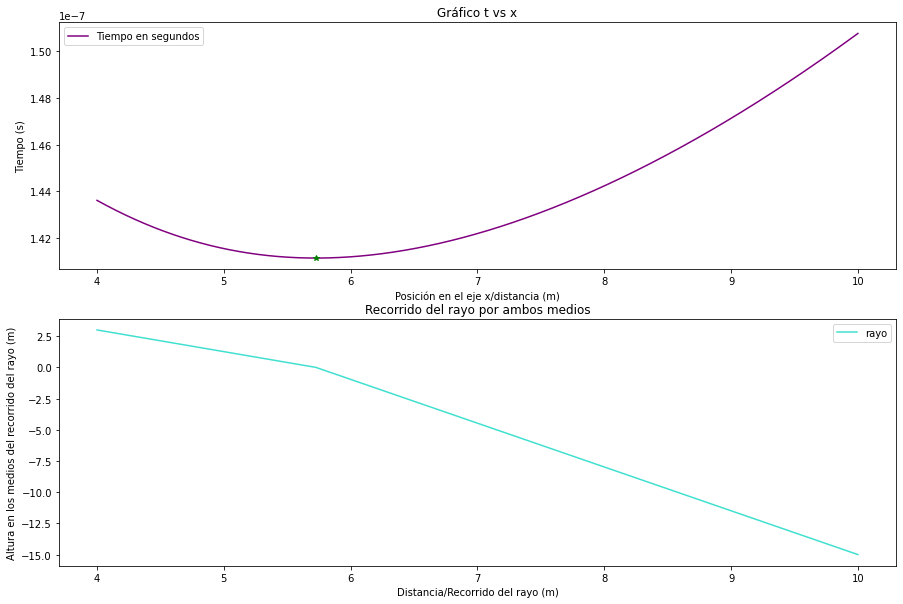

In [ ]:
fig, ax = plt.subplots(2,figsize=(15, 10))
ax[0].plot(xdiferentes,tiempos, color = 'purple')
ax[0].plot(xmin,tmin,'g*')
ax[0].title.set_text('Gráfico t vs x')
ax[0].set_xlabel('Posición en el eje x/distancia (m)')
ax[0].set_ylabel('Tiempo (s)')
ax[0].legend(['Tiempo en segundos'])

ax[1].plot([x1,xmin,x2],[y1,0,y2], color = 'turquoise')
ax[1].title.set_text('Recorrido del rayo por ambos medios')
ax[1].set_xlabel('Distancia/Recorrido del rayo (m)')
ax[1].set_ylabel('Altura en los medios del recorrido del rayo (m)')
ax[1].legend(['rayo'])

#Comprobando

In [ ]:
#Primero encontramos los angulos segun el recorrido que encontramos
#Ángulo del primer medio
hip = math.sqrt(math.pow(xmin-x1,2) + math.pow(y1,2))
ang1 = 90 - math.degrees(math.acos((xmin-x1)/hip))

#Ángulo del segundo medio
hip = math.sqrt(math.pow(x2-xmin,2) + math.pow(y2,2))
ang2 = math.degrees(math.acos(abs(y2)/hip))

print("El angulo del primero medio es: ",ang1)
print("El angulo del segundo medio es: ",ang2)


El angulo del primero medio es:  29.909579400108257
El angulo del segundo medio es:  15.904923515753023


In [ ]:
#Diferencia entre la division de angulos menos la division de coeficientes del ambiente. (ver pdf)

res1 = (math.sin(ang1)/math.sin(ang2))
res2 = n_Diamante/n_Agua
print(res1)
print(res2)
print(res1-res2)

5.099533208535795
1.819548872180451
3.2799843363553443


# Porcentaje de Error

In [ ]:
Error = 0
n1 = n_Agua
n2 = n_Diamante
nTeorico = NTeorico(n1,n2)
nExperimental = NExperimental(ang1,ang2)

def PorcentajeError(nTeorico, nExperimental):
  Error = (abs((nTeorico - nExperimental) / nTeorico)) * 100
  return Error

Error = PorcentajeError(nTeorico, nExperimental)
print("El porcentaje de error obtenido es {a}%".format(a = Error))
print("El valor de nTeórico es: ", nTeorico)
print("El valor de nExperimental es: ", nExperimental)

El porcentaje de error obtenido es 2.2225298880818313e-05%
El valor de nTeórico es:  1.819548872180451
El valor de nExperimental es:  1.819549276580626
